
# <div class="alert alert-block alert-info"> <span  style= "font-family: Times New Roman">Light Gradient Boosting Machine </span> </div>

## Table of Contents
* [Import necessary libraries](#Import_necessary_libraries)
* [Data loading](#Data_loading)
* [Data Interpretation](#Data_Interpretation)
* [Data preprocessing](#Data_preprocessing)
* [Exploratory Data Analysis](#Exploratory_data_analysis)
* [Data Visualization](#Data_Visualization)
    * [Univariate Analysis](#univariate_analysis)
* [Automated EDA](#Automated_EDA)
    * [Dataprep](#dataprep)
    * [Pandas-profiling](#pandas_profiling)
    * [Sweetviz](#sweetviz)
* [Feature Engineering](#Feature_Engineering)
    * [Correlation](#correlation)
    * [Feature Transformation](#Feature_transformation)
    * [Feature Scaling](#Feature_Scaling)
    * [Feature Importance](#Feature_Importance)
        * [Using Decision Tree](#decision_tree)
        * [Using Random Forest](#random_forest)
* [Model Building](#Model_Building)
* [Evaluation metrics](#Evaluation_metrics)
* [Hyperparameter Tuning](#Hyperparameter_Tuning)

Light GBM is a gradient boosting framework that uses tree based learning algorithm.

It is different from other algorithms because...<br>
Light GBM `grows tree vertically` while other algorithm `grows trees horizontally` meaning that Light GBM grows `tree leaf-wise` while other algorithm grows `level-wise`. It will choose the leaf with `max delta loss` to grow. When growing the same leaf, Leaf-wise algorithm can reduce `more loss than a level-wise algorithm`.

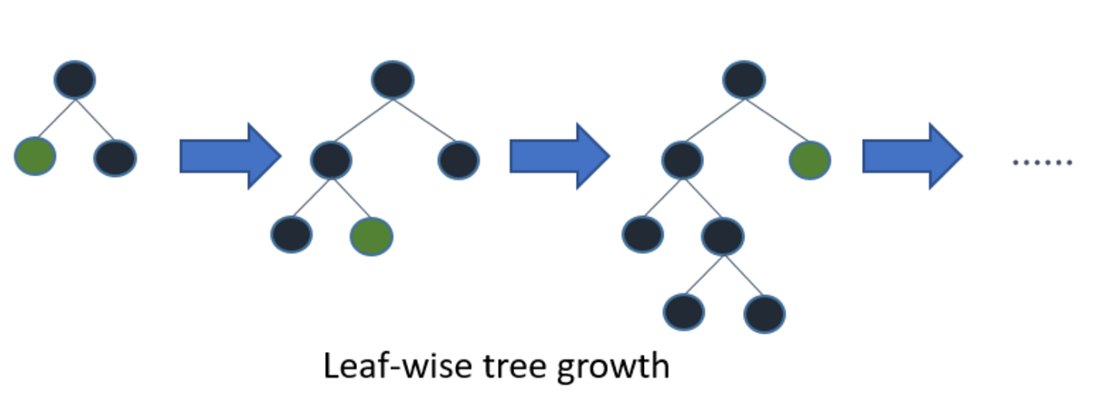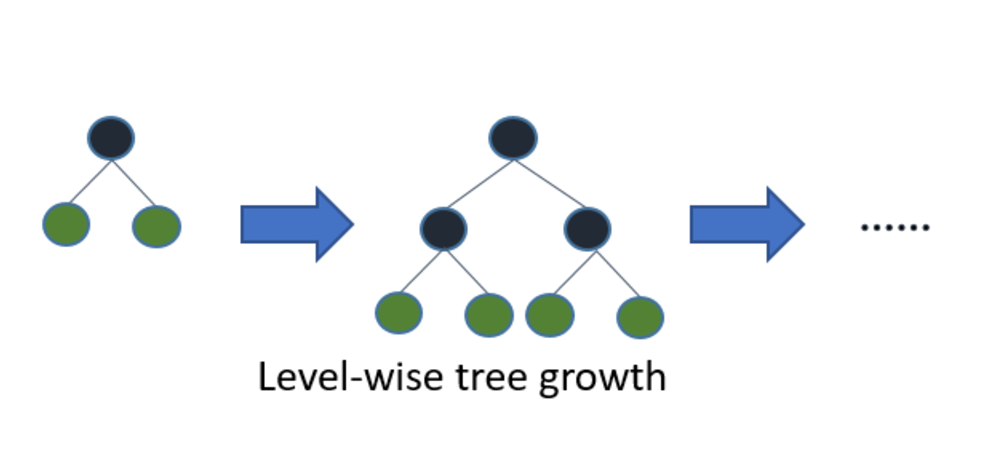

LightGBM grows tree vertically while other tree based learning algorithms grow trees horizontally. 
It means that LightGBM grows tree leaf-wise while other algorithms grow level-wise. It will choose 
the leaf with max delta loss to grow. When growing the same leaf, leaf-wise algorithm can reduce more 
loss than a level-wise algorithm.

If we grow the full tree, best-first (leaf-wise) and depth-first (level-wise) will result in the same tree. The difference is in the order in which the tree is expanded. Since we don't normally grow trees to their full depth, order matters.<br>

Application of early stopping criteria and pruning methods can result in very different trees. Because leaf-wise chooses splits based on their contribution to the global loss and not just the loss along a particular branch, it often (not always) will learn lower-error trees "faster" than level-wise. <br>

For a small number of nodes, leaf-wise will probably out-perform level-wise. As we add more nodes, without stopping or pruning they will converge to the same performance because they will literally build the same tree eventually. <br>

### Control Parameters 
- max_depth : It describes the maximum depth of tree. This parameter is used to handle model overfitting. If you feel that your model is overfitted, you should to lower max_depth. <br>
- min_data_in_leaf : It is the minimum number of the records a leaf may have. The default value is 20, optimum value. It is also used to deal with overfitting. <br>
- feature_fraction: Used when your boosting is random forest. 0.8 feature fraction means LightGBM will select 80% of parameters randomly in each iteration for building trees. <br>
- bagging_fraction : specifies the fraction of data to be used for each iteration and is generally used to speed up the training and avoid overfitting. <br>
- early_stopping_round : This parameter can help you speed up your analysis. Model will stop training if one metric of one validation data doesn’t improve in last early_stopping_round rounds. This will reduce excessive iterations. <br>
- lambda : lambda specifies regularization. Typical value ranges from 0 to 1. <br>
- min_gain_to_split : This parameter will describe the minimum gain to make a split. It can used to control number of useful splits in tree. <br>
- max_cat_group : When the number of category is large, finding the split point on it is easily over-fitting. So LightGBM merges them into ‘max_cat_group’ groups, and finds the split points on the group boundaries. <br>


### Core Parameters <br>
- Task : It specifies the task you want to perform on data. It may be either train or predict. <br>

- Application : This is the most important parameter and specifies the application of your model, whether it is a regression problem or classification problem. LightGBM will by default consider model as a regression model. <br>

- gbdt : traditional Gradient Boosting Decision Tree <br>
- rf : random forest <br>
- dart : Dropouts meet Multiple Additive Regression Trees <br>
- goss : Gradient-based One-Side Sampling <br>
- num_boost_round : Number of boosting iterations <br>
- learning_rate : This determines the impact of each tree on the final outcome. GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates. <br>
- num_leaves : number of leaves in full tree <br>
- device : default: cpu, can also pass gpu <br>


### Metric Parameters
- mae : mean absolute error
- mse : mean squared error
- binary_logloss : loss for binary classification
- multi_logloss : loss for multi classification

### Lets see the functioning of the algorithm with an example:

Download dataset from here: 
To open this link <a href='https://drive.google.com/file/d/1TeVZmUNL5io3aIf9saOxF3hrzQCTyR-9/view?usp=share_link' title='Google Drive'> Click here

### <div class="alert alert-block alert-success"> <span  style= "font-family: Times New Roman">**Objective:** Predict the client loan subscription for a term deposit. </span> </div>

##  <mark> <span  style= "font-family: Times New Roman">Importing necessary  libraries  </span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [1]:
# Basic Python libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Getting default style
plt.rcParams.update(plt.rcParamsDefault)

In [3]:
# Import warnings library and ignore them using this filter function
import warnings
warnings.filterwarnings('ignore')

In [4]:
# display from scientific notation to floating format
pd.options.display.float_format = '{:.4f}'.format

In [5]:
# Plotting in notebook; If it is in colab; define 'colab'
import plotly.io as pio
pio.renderers.default='notebook'

In [6]:
# Import plotly libraries to use more predefined plots and animations
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
# Initiates the plotly interactive notebook mode 
# iplots are interactive plots means zoom,hover,toggle, such interactions can be easily done
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [7]:
# Importing libraries for model building
from sklearn.metrics import classification_report,confusion_matrix,precision_score
from sklearn.metrics import recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn import metrics

In [8]:
# Importing LightGBM Libraries
import lightgbm as lbm

# For feature importance
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## <mark><span  style= "font-family: Times New Roman">Data Loading </span></mark> <a class="anchor" id="Data_loading"></a>

In [9]:
# Reading csv file
df = pd.read_csv('bank-full.csv', delimiter=';')

In [10]:
# Format a table for the dataframe

In [14]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border-style: solid;
}

In [15]:
# Display the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## <mark> <span  style= "font-family: Times New Roman"> Data Interpretation  </span> </mark> <a class="anchor" id="Data_Interpretation"></a>

<mark>**We should understand the variables before preprocessing it.** </mark><br>
- **job:** (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-  employed","retired","technician","services") 
- **marital**: (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
- **education**: (categorical: "unknown","secondary","primary","tertiary")
- **default**: has credit in default? (binary: "yes","no")
- **balance**: average yearly balance, in euros (numeric)
- **housing**: has housing loan? (binary: "yes","no")
- **loan**: has personal loan? (binary: "yes","no")
- **contact**: contact communication type (categorical: "unknown","telephone","cellular") 
- **day**: last contact day of the month (numeric)
- **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- **duration**: last contact duration, in seconds (numeric)
- **campaign:**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted) 
- **previous**: number of contacts performed before this campaign and for this client (numeric) 
- **poutcome**: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
- **y**: has the client subscribed a term deposit? (binary: "yes","no")


##  <mark><span  style= "font-family: Times New Roman">Data preprocessing </span> </mark> <a class="anchor" id="Data_preprocessing"></a>

In [16]:
# Displays rows and columns count
df.shape

(45211, 17)

In [17]:
# drop duplicates 
df.drop_duplicates(inplace=True)
df.shape

(45211, 17)

In [18]:
# Counts the sum of all null values for every feature
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [19]:
# Gives all the basic statistical results
# We can observe central tendency features along with standard deviation
# We can also estimate the approximate outlier analysis from this data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.0000,45211.0000,45211.0000,45211.0000,45211.0000,45211.0000,45211.0000
mean,40.9362,1362.2721,15.8064,258.1631,2.7638,40.1978,0.5803
std,10.6188,3044.7658,8.3225,257.5278,3.0980,100.1287,2.3034
min,18.0000,-8019.0000,1.0000,0.0000,1.0000,-1.0000,0.0000
25%,33.0000,72.0000,8.0000,103.0000,1.0000,-1.0000,0.0000
50%,39.0000,448.0000,16.0000,180.0000,2.0000,-1.0000,0.0000
75%,48.0000,1428.0000,21.0000,319.0000,3.0000,-1.0000,0.0000
max,95.0000,102127.0000,31.0000,4918.0000,63.0000,871.0000,275.0000


In [20]:
# We observe data types of all features and non-null count for every feature
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [21]:
# Since there is only one categorical feature, Seeing the count of various categories of this features
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

#### <mark> These are no missing values and columns are understandable as well. </mark>

In [22]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


## <mark> <span  style= " font-family: Times New Roman"> Exploratory Data Analysis  </span> </mark> <a class="anchor" id="Exploratory_data_analysis"></a>

In [23]:
### Make a list of requirements and solve them
##................................................................
# Divide into numerical and categorical variables
# Value counts of every category variable
# Plots for categorical and numerical seperately using matplotlib,seaborn and plotly
# Encode the categorical variables
# Transforming the numerical variables - annual_income --> log_annual_income

In [24]:
# Divide into numerical and categorical variables
# As we changed all the non-categorical object data into numerical, we can do this:
df_numerical = df[['age','balance','day','duration','campaign','pdays','previous']]
df_categorical = df[['job','marital','education','default','housing','loan','contact','month','poutcome','y']]

In [25]:
df_categorical.shape

(45211, 10)

In [26]:
df_numerical.shape

(45211, 7)

In [27]:
df_categorical.head(2)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no


In [28]:
df_numerical.head(2)

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0


In [29]:
# Value counts of every category variable
for col in df_categorical.columns:
    print('===========================')
    print('{}'.format(col.upper()))
    print( df_categorical[col].value_counts())

JOB
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
MARITAL
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
EDUCATION
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
DEFAULT
no     44396
yes      815
Name: default, dtype: int64
HOUSING
yes    25130
no     20081
Name: housing, dtype: int64
LOAN
no     37967
yes     7244
Name: loan, dtype: int64
CONTACT
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
MONTH
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
POUTCOME
unknown    36959
failure     490

## <mark> <span  style= " font-family: Times New Roman"> Data Visualization  </span> </mark> <a class="anchor" id="Data_Visualization"></a>

### Lets use `matplotlib`, `seaborn` and `plotly` to perform `EDA` and `Visualization`

### <mark> <span style="color:#FF4701">Univariate Analysis</span> </mark> <a class="anchor" id="univariate_analysis"></a>

In [55]:
# A few color palette for aesthetic plots
# Check out all of them by individually executing them. 
# Remember, aesthetics also add an interesting point for the flow of work.
mesh_1 = ['#AEFFBE','#94FFF1','#FFE48A','#FF9EBE']
sns.color_palette(mesh_1)
colors = ['#FF5851', '#F3C130', '#414A6B', '#B49A85', '#1C1B20']
sns.color_palette(colors)
colors_1 = ['#1D4851','#9AB5BC','#FF9001','#FF4701']
sns.color_palette(colors_1)
colors_2 = ['#0D110F','#6F8C64','#FDD584','#2A4731']
sns.color_palette(colors_2)
colors_3 = ['#0B0B11','#8288C3','#242961','#D0BED4']
sns.color_palette(colors_3)
colors_4 = ['#645CAA','#A084CA','#BFACE0','#EBC7E8']
sns.color_palette(colors_4)

[(0.39215686274509803, 0.3607843137254902, 0.6666666666666666),
 (0.6274509803921569, 0.5176470588235295, 0.792156862745098),
 (0.7490196078431373, 0.6745098039215687, 0.8784313725490196),
 (0.9215686274509803, 0.7803921568627451, 0.9098039215686274)]

### These are some palettes which can be used for the plots. They may seem unimportant but they really bring beautiful aesthetic appearance to the notebook and data as well.

### Plots for categorical columns

In [99]:
#Writing a function to plot the count and pie plot
def plot_data(column):
    # 1 row and 2 columns subplots definition
    fig,axes = plt.subplots(1,2,figsize=(15,5))
    # Fixing supertitle
    fig.suptitle(column,fontsize=20)
    
    # count plot in first plot with the given column as axes[0]
    sns.countplot(ax=axes[0],x=column,data=df)
    axes[0].set_title('Count of {}s'.format(column),fontsize=20)
    if df[column].value_counts().index.size>5:
        axes[0].set_xticklabels(labels=df[column].unique(),rotation=90)

    # pie plot in second plot of defined subplots
    axes[1] = plt.pie(df[column].value_counts().values,labels=df[column].value_counts().index,radius=1.2,autopct='%1.2f%%')
    plt.title('Count of {}s'.format(column))
    plt.show()

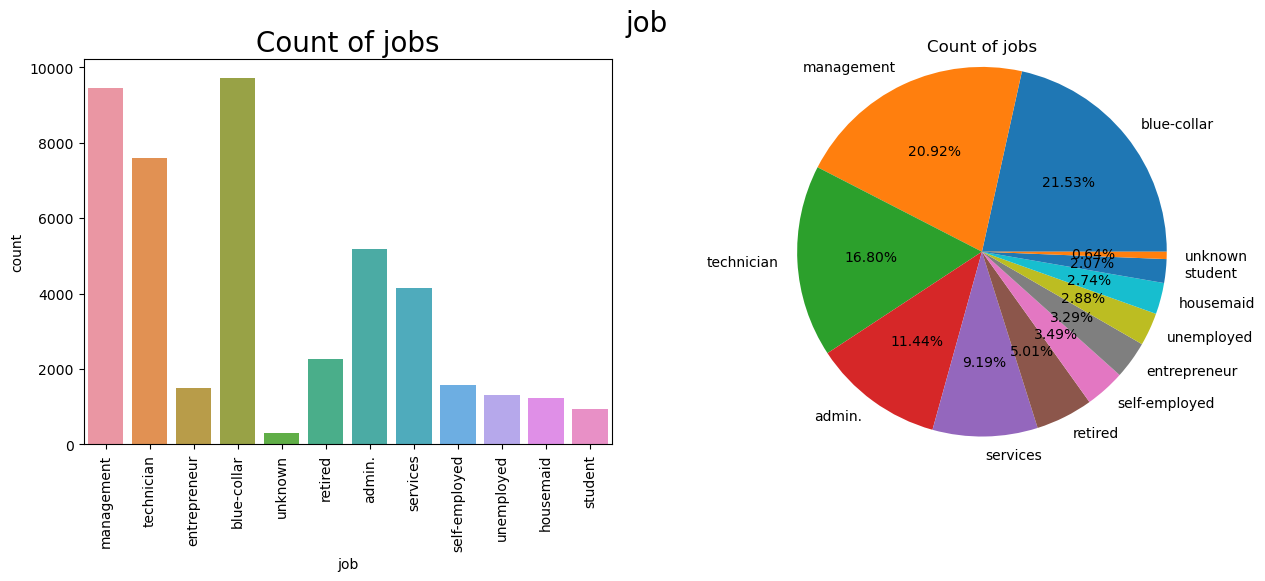

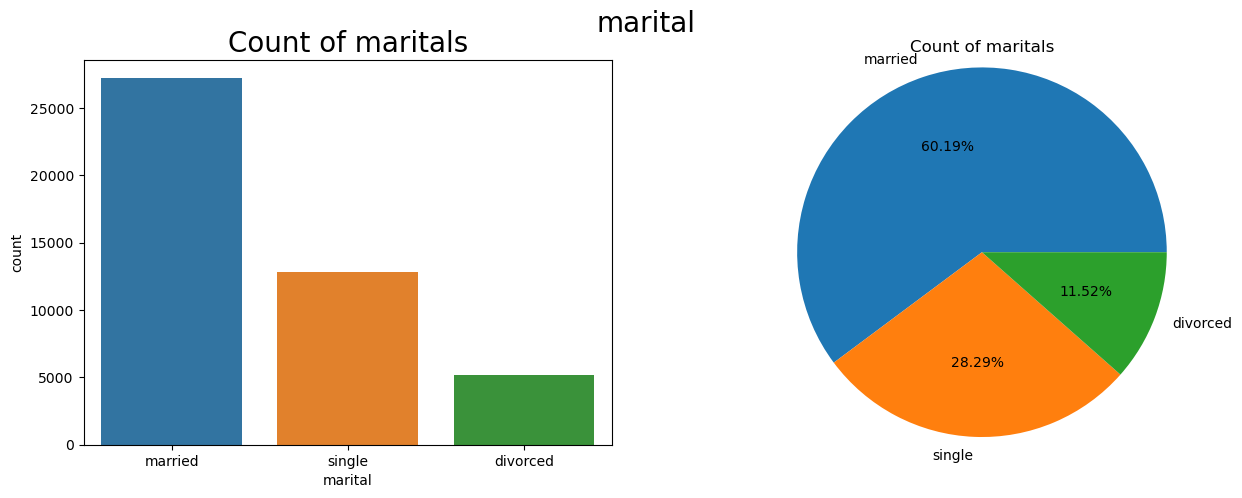

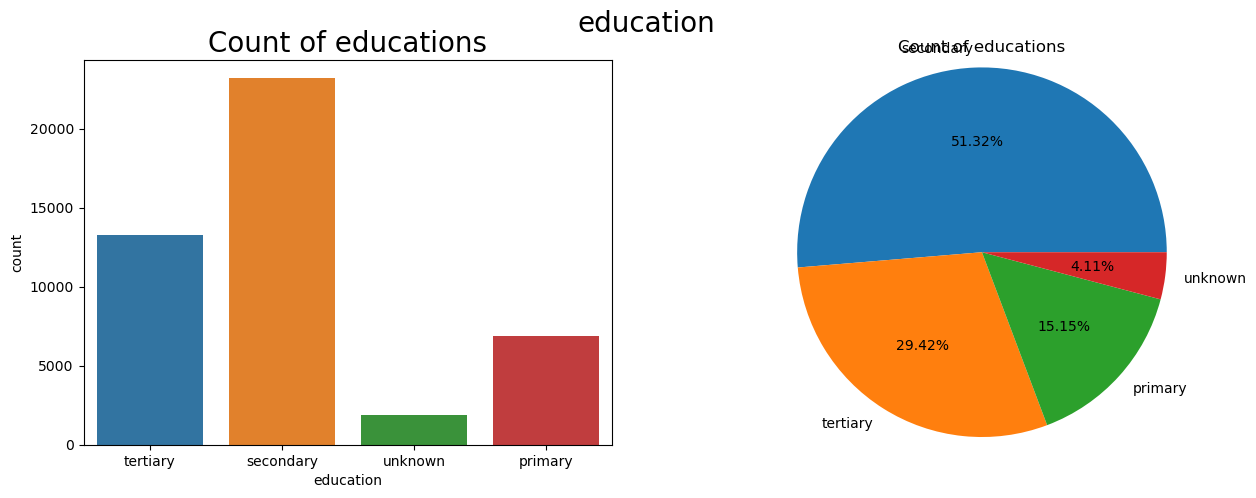

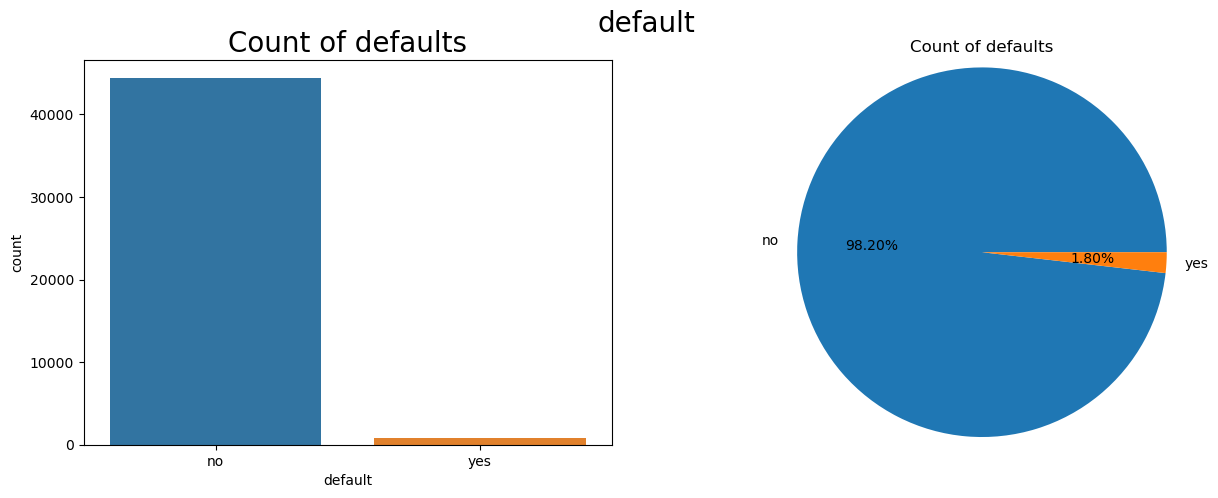

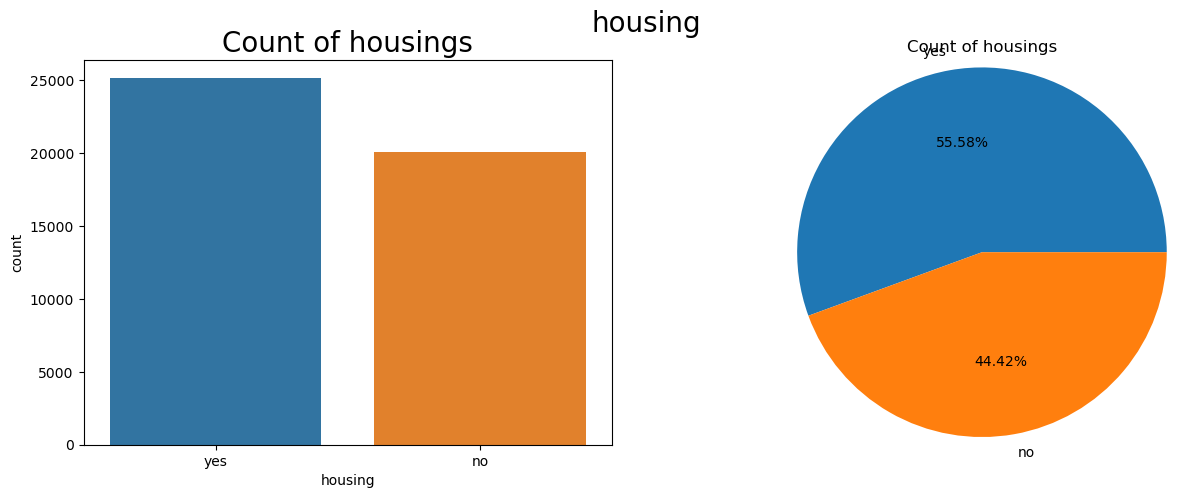

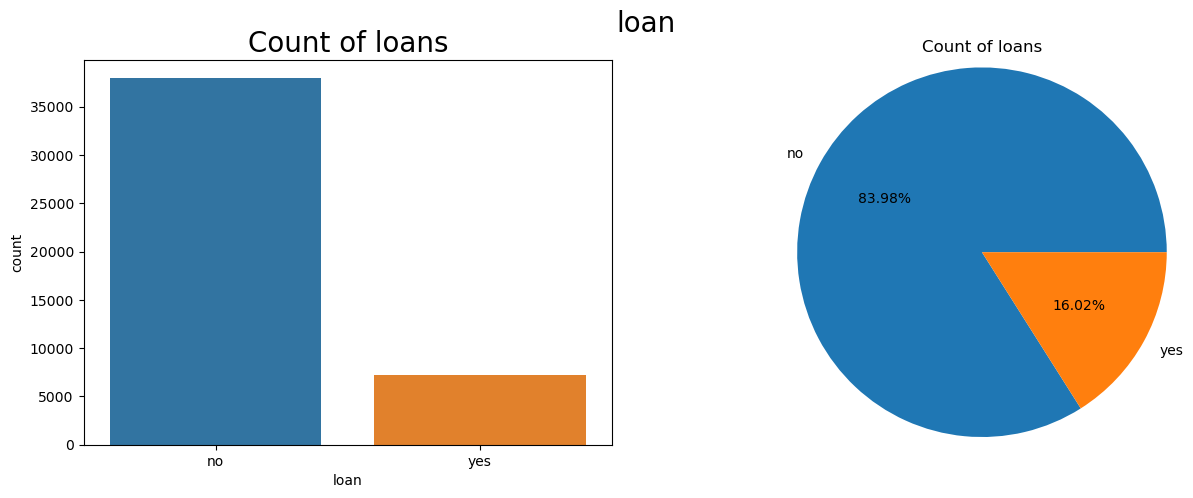

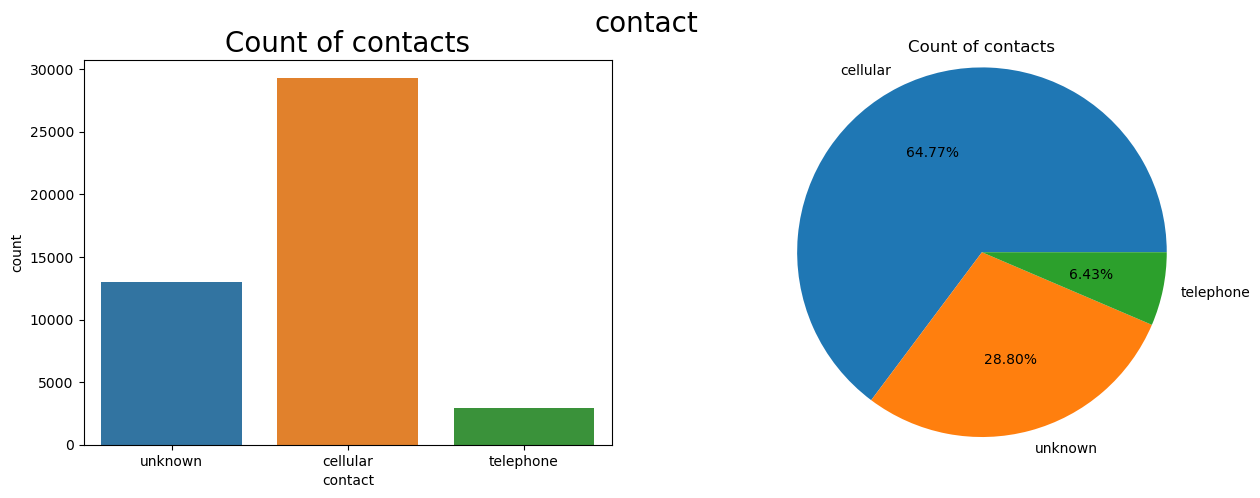

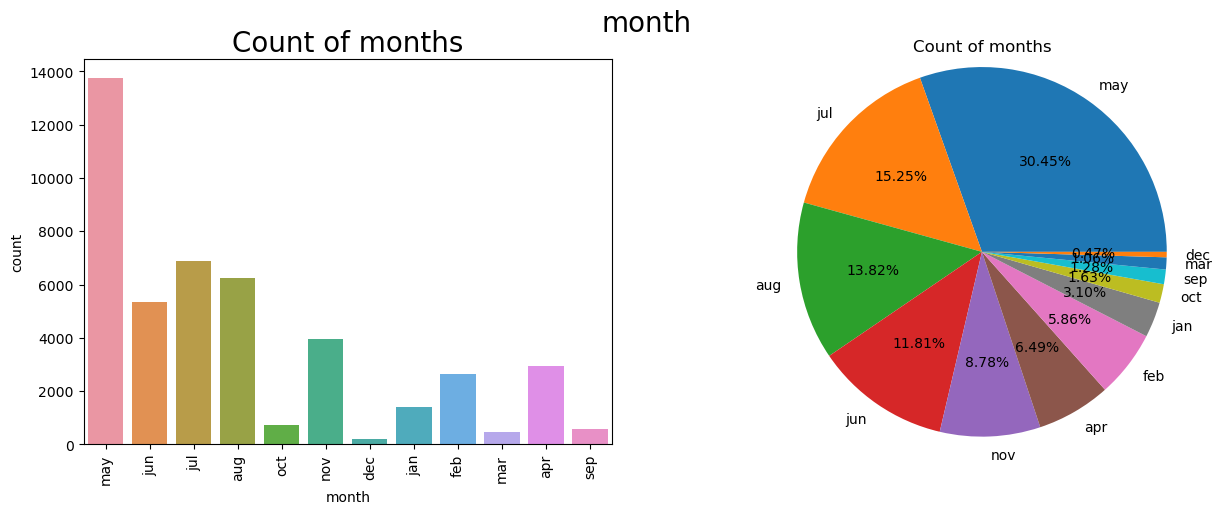

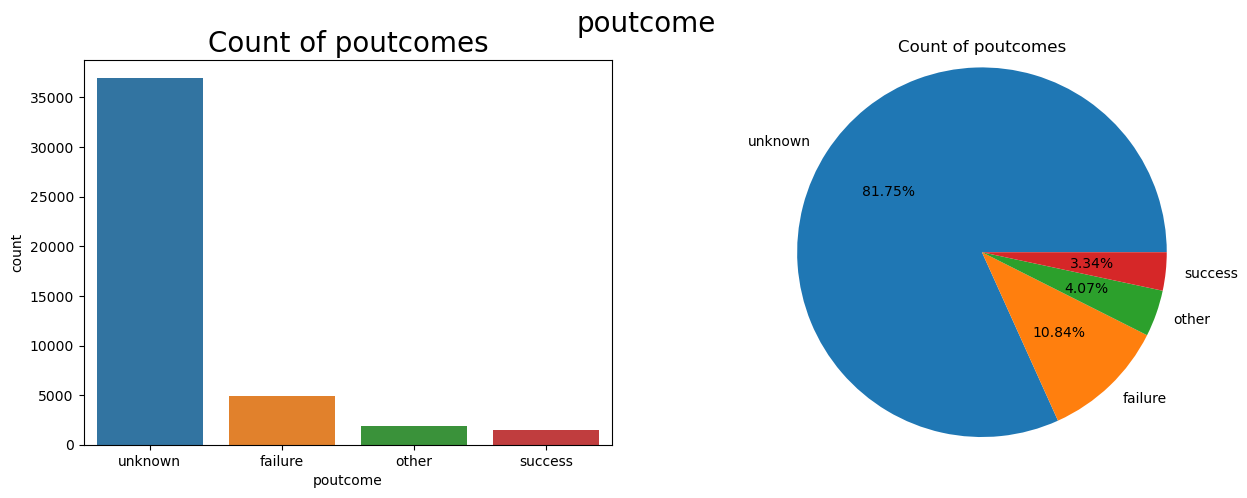

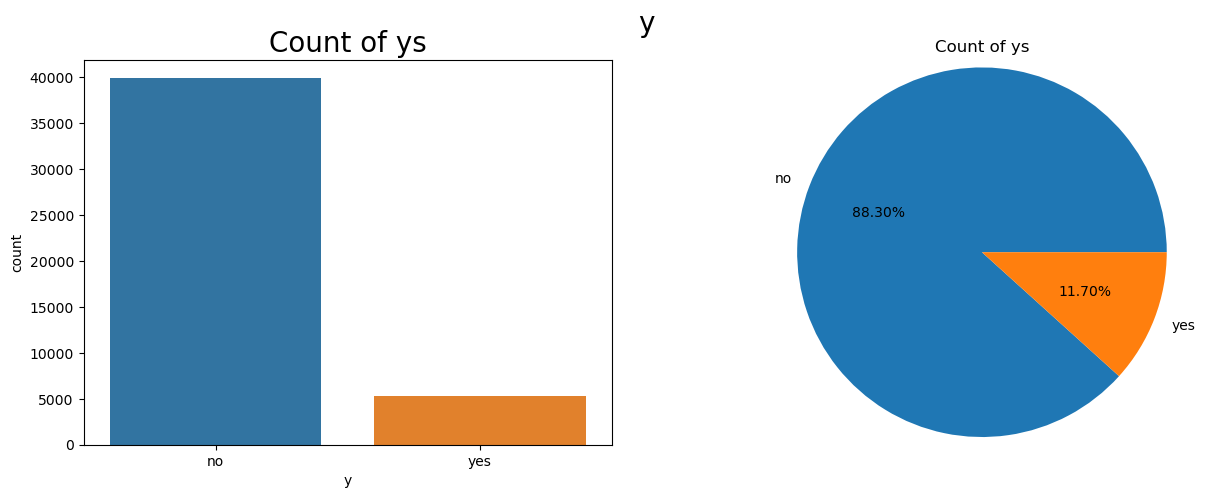

In [101]:
for col in df_categorical.columns:
    plot_data(col)

### Conclusions: 
- We can see majority of customers in admin.,blue-collar, very low strength from services departments less 

### Plots for categorical columns with output

In [68]:
# Writing a function to operate the same for all the features.
def plot_data_wrt_output(column):
    # 1 row and 2 columns subplots definition
    fig,axes = plt.subplots(1,2,figsize=(15,5))
    # Fixing supertitle
    fig.suptitle(column,fontsize=20)
    
    # count plot in first plot with the given column w.r.t output as axes[0]
    sns.countplot(ax=axes[0],x=column,hue='y',data=df)
    axes[0].set_title('Count of {} with respect to output'.format(column),fontsize=15)
    if df[column].value_counts().index.size>5:
        axes[0].set_xticklabels(labels=df[column].value_counts().index,rotation=90)
    
    # pie plot in second plot of defined subplots
    axes[1] = plt.pie(df.groupby(column)['y'].value_counts().values,labels=df.groupby(column)['y'].value_counts().index,radius=1.2,autopct='%1.2f%%')
    plt.title('Percentage of {}s for term deposit'.format(column))
    plt.show()

In [ ]:
for col in df_categorical.columns:
    plot_data_wrt_output(col)

### Plots for numerical data

In [134]:
# Defining a function to plot Histogram, distribution plot and a boxplot
# Inputting the feature name and the color palette decided above.
def plot_data_num(column,clr):
    # figsize is given along with the rows=1 and columns=3
    fig,axes = plt.subplots(1,3,figsize=(18,5))
    # super title is given with fontsize
    fig.suptitle(column,fontsize=20,fontstyle='oblique')

    # Histogram is plotted, axes[0] gives the sequential plot number, color is given from the colors list
    sns.histplot(ax=axes[0],x=column,data=df,color=clr[1])
    # Title name is formatted with custom fontsize
    axes[0].set_title('Histogram of {}'.format(column),fontstyle='italic',fontsize=15,color='black')
    
    # Distribution plot is plotted with axis label as column name 
    sns.distplot(ax=axes[1],x=df[column],axlabel=column,color=clr[0])
    # Title name of the distribution plot
    axes[1].set_title('Distribution of {}'.format(column),fontstyle='italic',fontsize=15,color='black')
    # axes[0].set_title('Histogram of {} \n std={:.4f} \n var={:.4f} \n skew={:.4f} \n kurtosis={:.4f}'.format(column,
                       # df[column].std(),df[column].var(),df[column].skew(),df[column].kurtosis()),fontsize=15)
    plt.text(.95,.95,'std={:.4f} \n var={:.4f} \n skew={:.4f} \n kurtosis={:.4f}'.format(df[column].std(),
                df[column].var(),df[column].skew(),df[column].kurtosis()),ha='right', va='top', transform=axes[1].transAxes)

    # Box plot is made to check the Inter Quartile range and the stats inferences
    sns.boxplot(ax=axes[2],x=column,data=df,color=clr[3])
    # Title of box plot is set and there it goes!! 
    axes[2].set_title('Boxplot of {}'.format(column),fontstyle='italic',fontsize=15,color='black')
    plt.show()

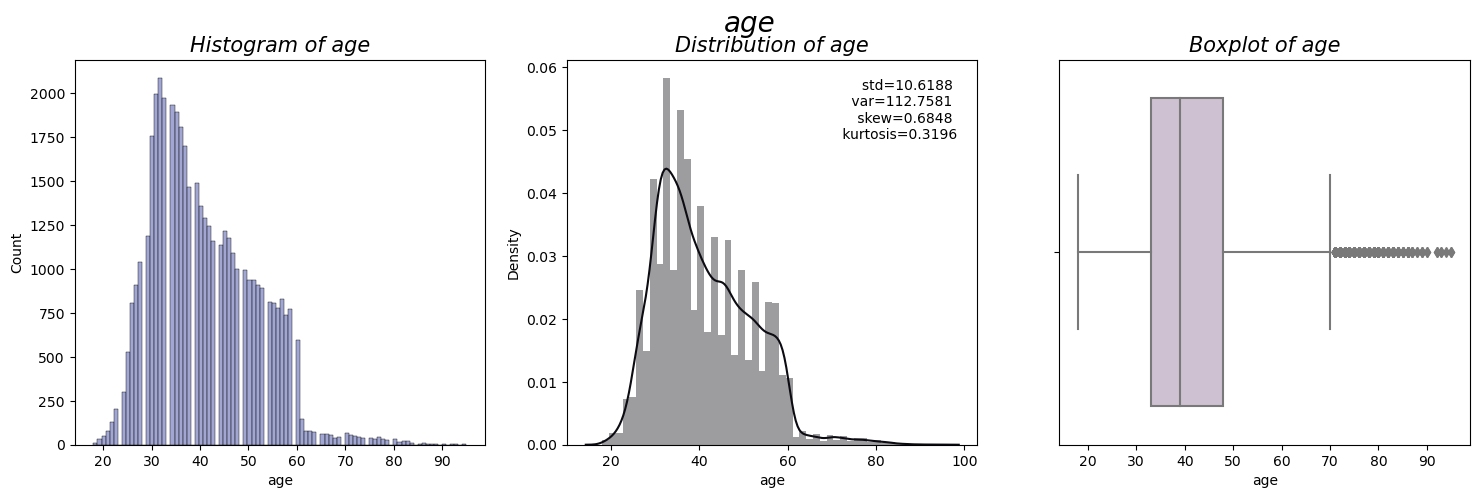

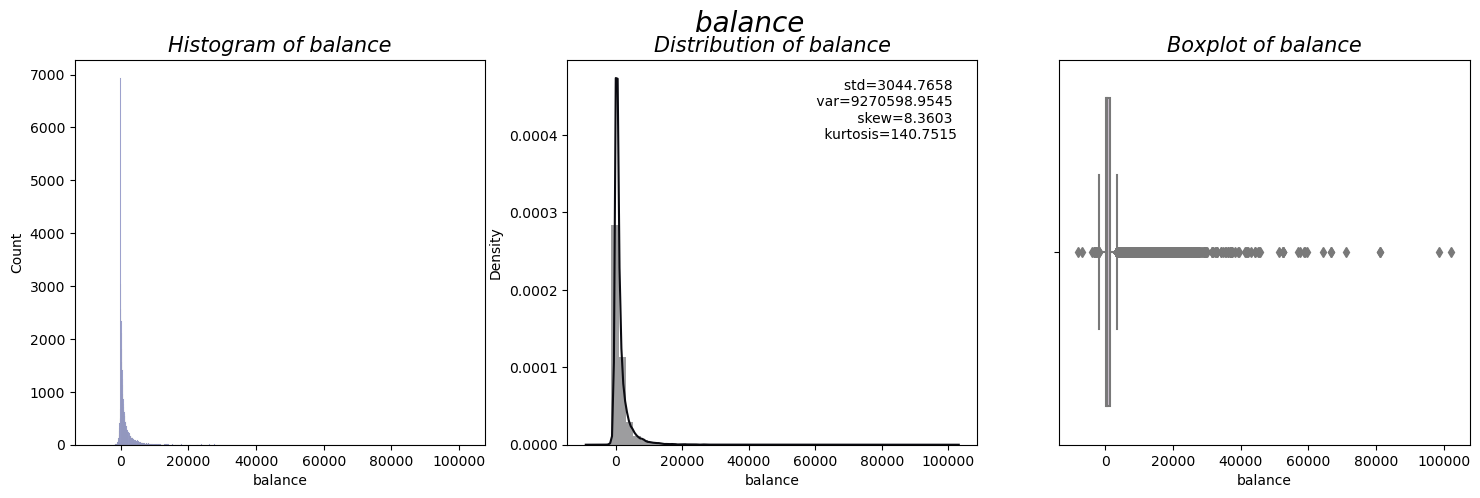

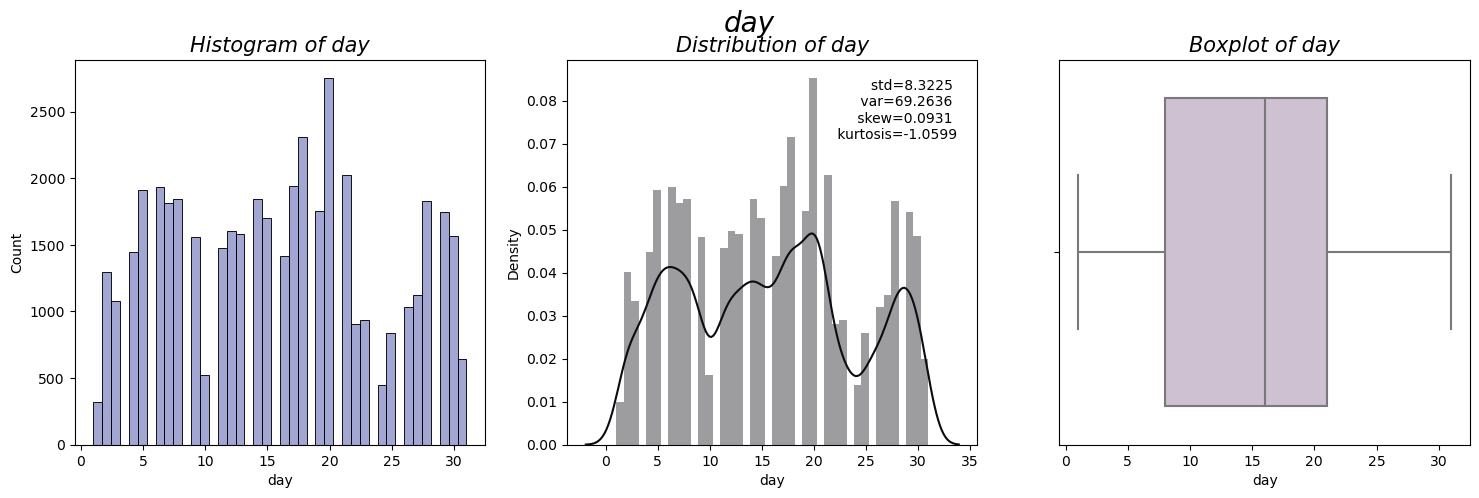

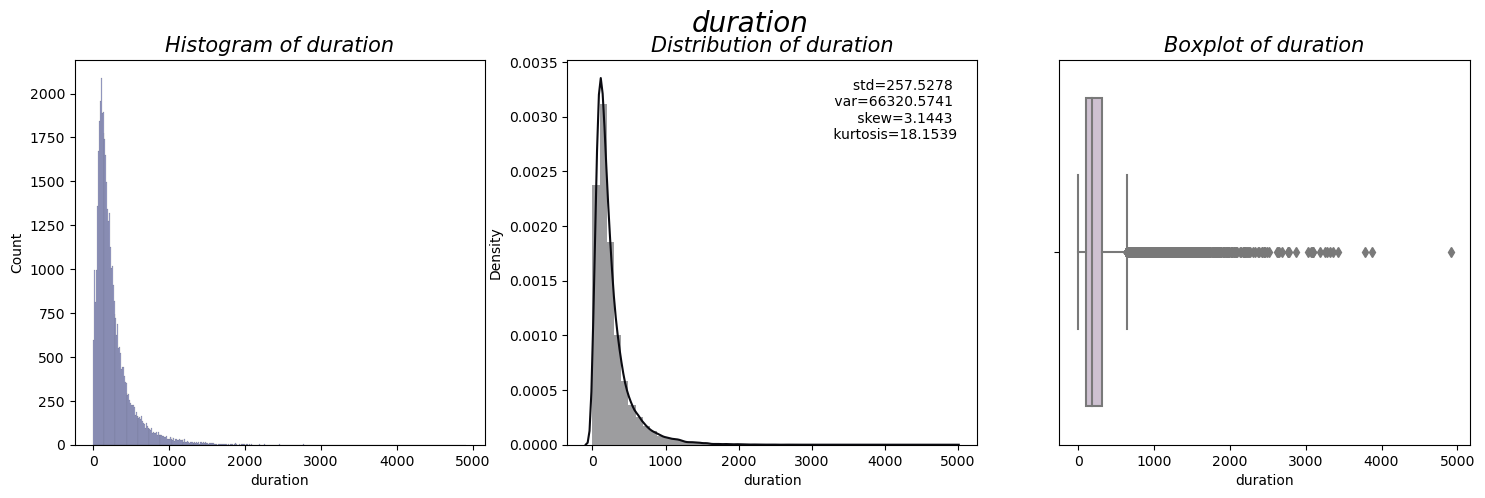

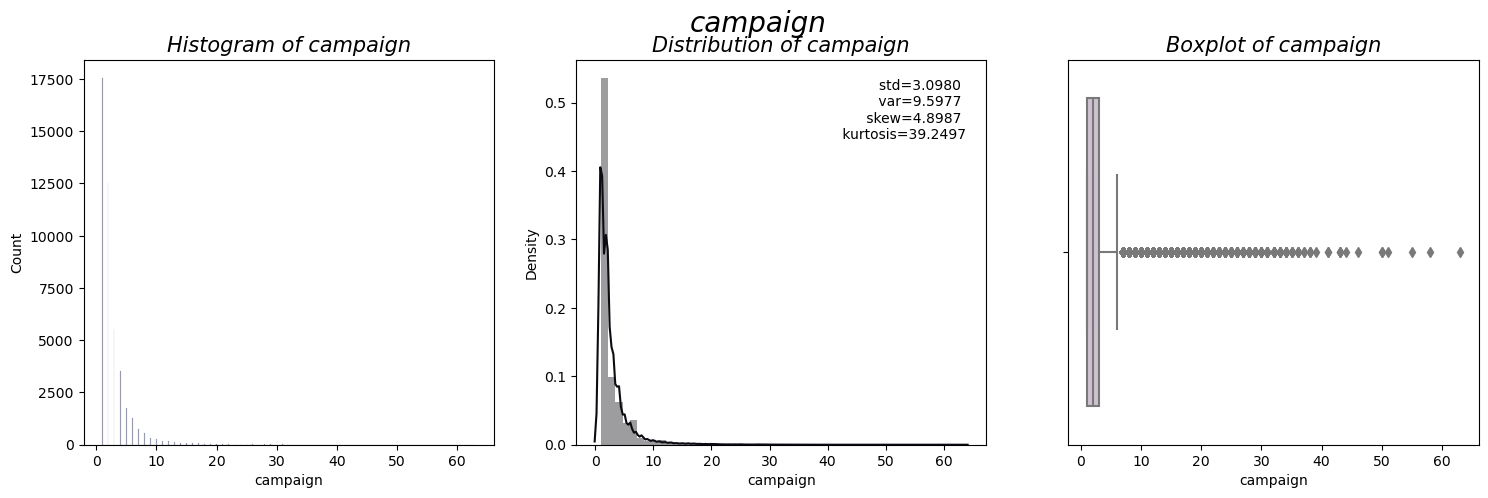

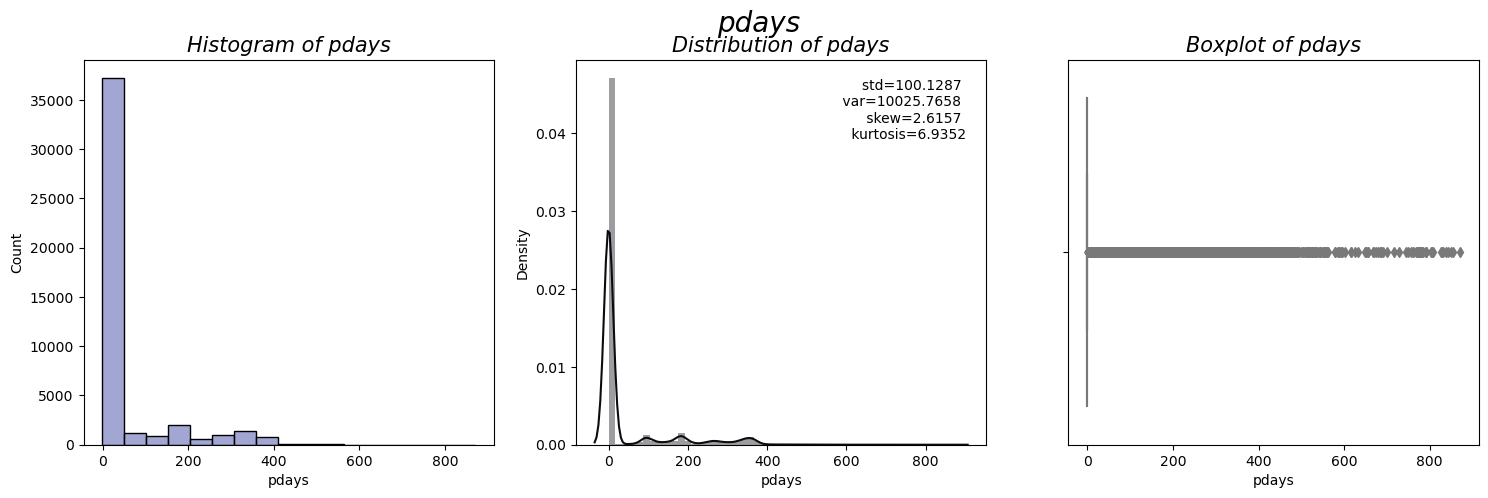

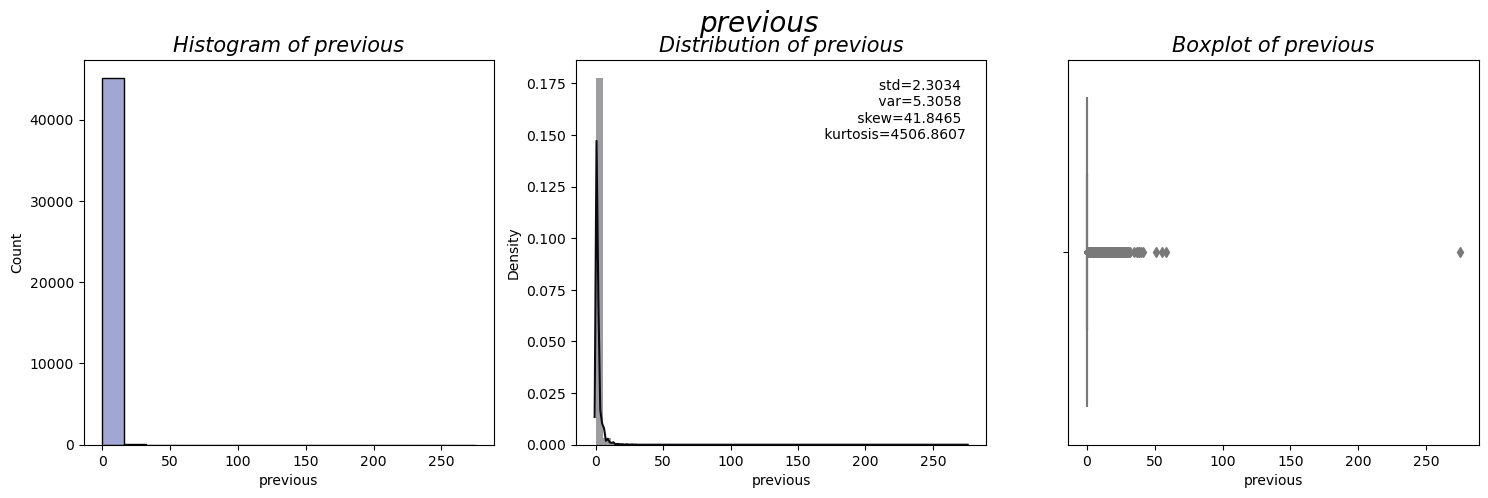

In [135]:
# List of columns to loop the plotting process.
# List of required columns to plot 
cols = df_numerical.columns
# colors = ['colors','colors_1','colors_2','colors_3','colors_4','colors','colors_1','colors_2','colors_3','colors_4','colors','colors_1']
# Starting the for loop for plotting all feature data
for i in range(len(cols)):
    # Plotting the data for each feature with a color palette
    # Also, Take time to analyse each distribution and frame inferences
    # Note the intuition of mean, median and modes along with std, variance, skewness and kurtosis
    plot_data_num(cols[i],colors_3)

In [102]:
# Lets do the same with respect to output
# Defining a function to plot Histogram, distribution plot and a boxplot respective to output.
# Inputting the feature name and the color palette decided above.
def plot_data_output(column):
    # figsize is given along with the rows=1 and columns=3
    fig,axes = plt.subplots(1,3,figsize=(18,5))
    # super title is given with fontsize
    fig.suptitle(column,fontsize=25,font="times new roman")

    # Histogram is plotted, axes[0] gives the sequential plot number, color is given from the colors list
    sns.histplot(ax=axes[0],x=column,hue='y',data=df,palette='Purples')
    # Title name is formatted with custom fontsize
    axes[0].set_title('{} w.r.t output'.format(column),fontsize=15)
    
    # Distribution plot is plotted with axis label as column name 
    sns.kdeplot(ax=axes[1],x=df[column],hue=df['y'],label=column,palette='Blues_d')
    # Title name of the distribution plot (kde plot)
    axes[1].set_title('KDE of {} w.r.t to output'.format(column),fontsize=15)

    # Box plot is made to check the Inter Quartile range and the stats inferences
    sns.violinplot(ax=axes[2],y=column,x='y',data=df,palette='winter')
    # Title of box plot is set and there it goes!! 
    axes[2].set_title(' Violin {} w.r.t output'.format(column),fontsize=15)
    plt.show()

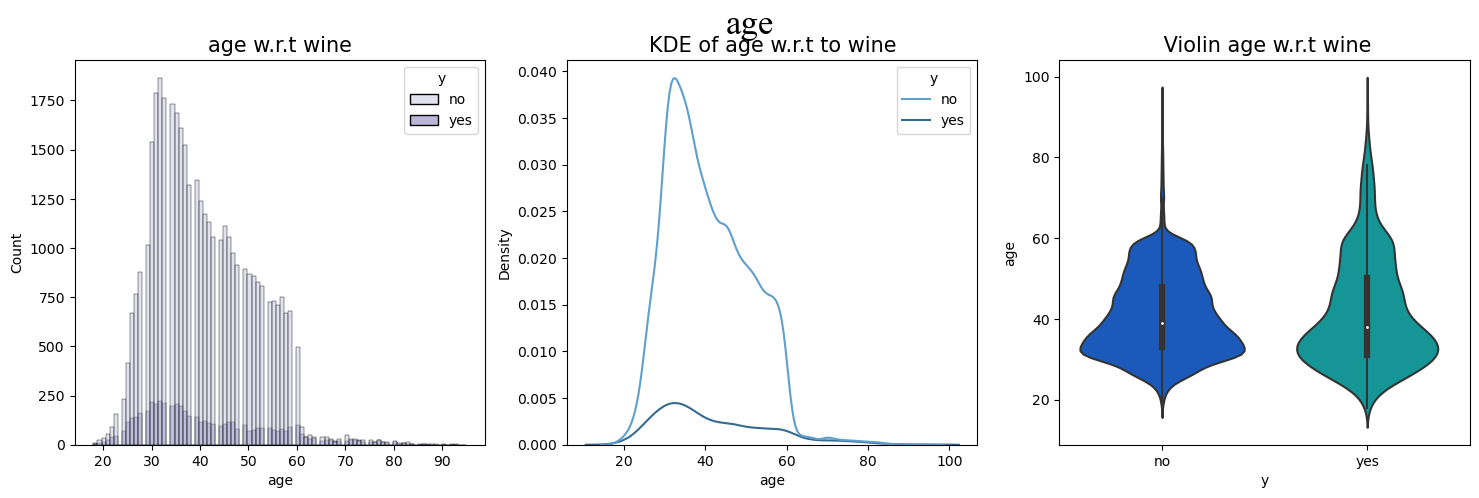

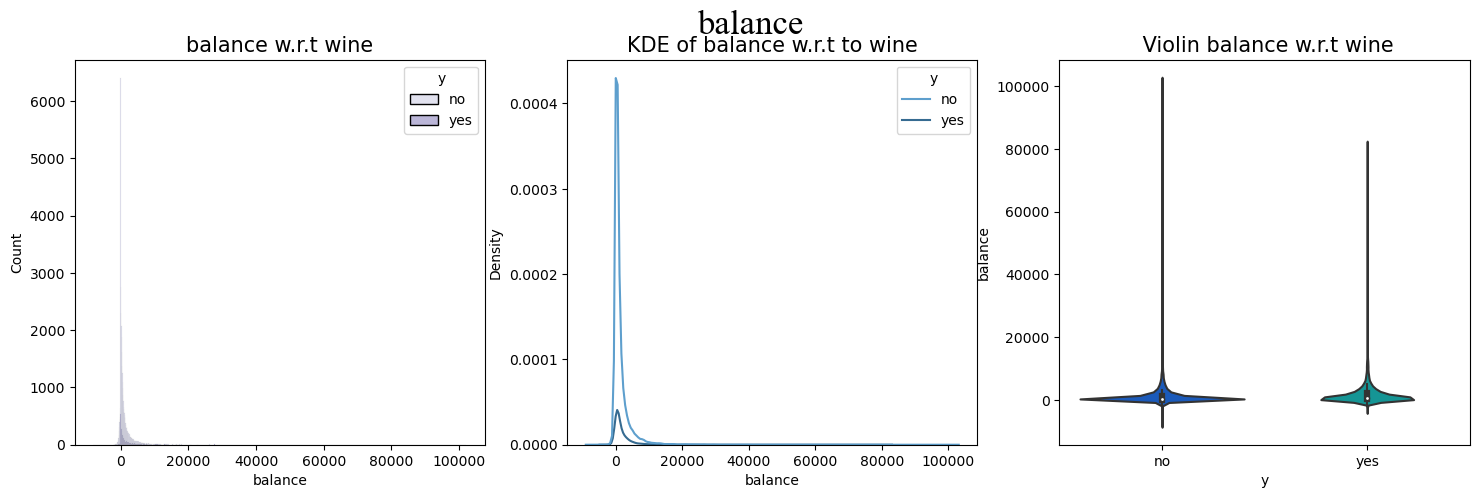

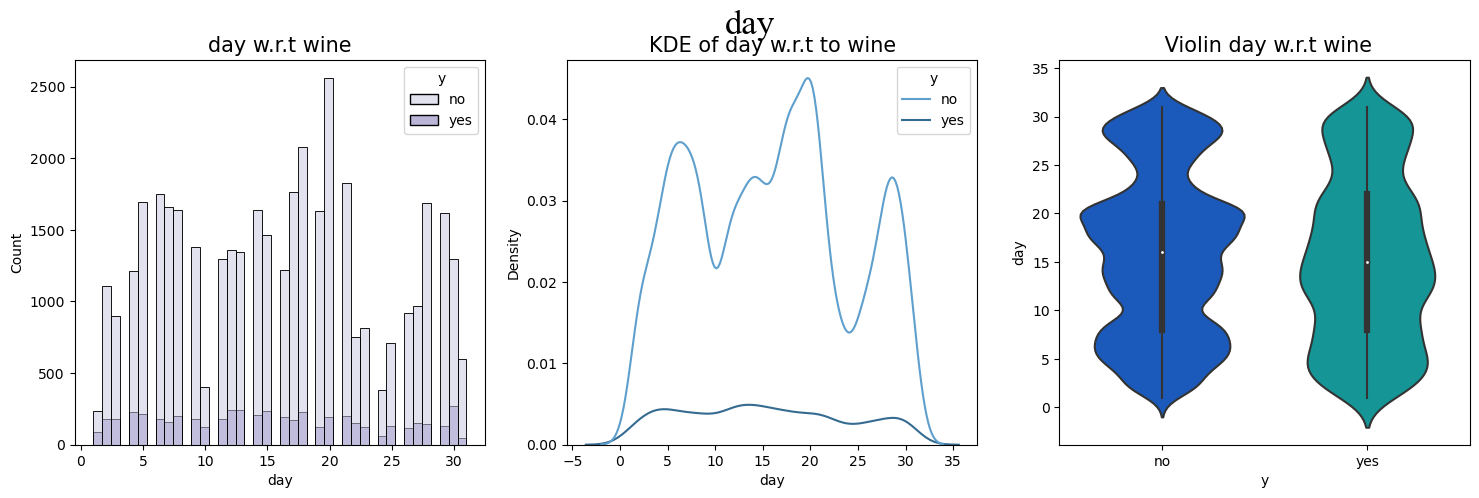

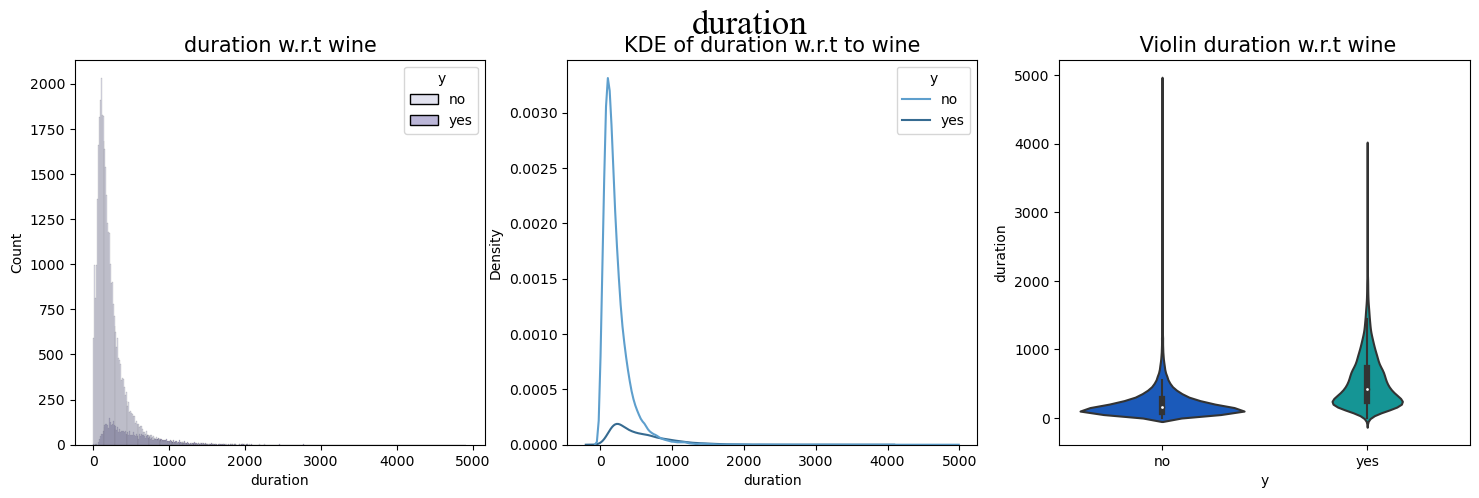

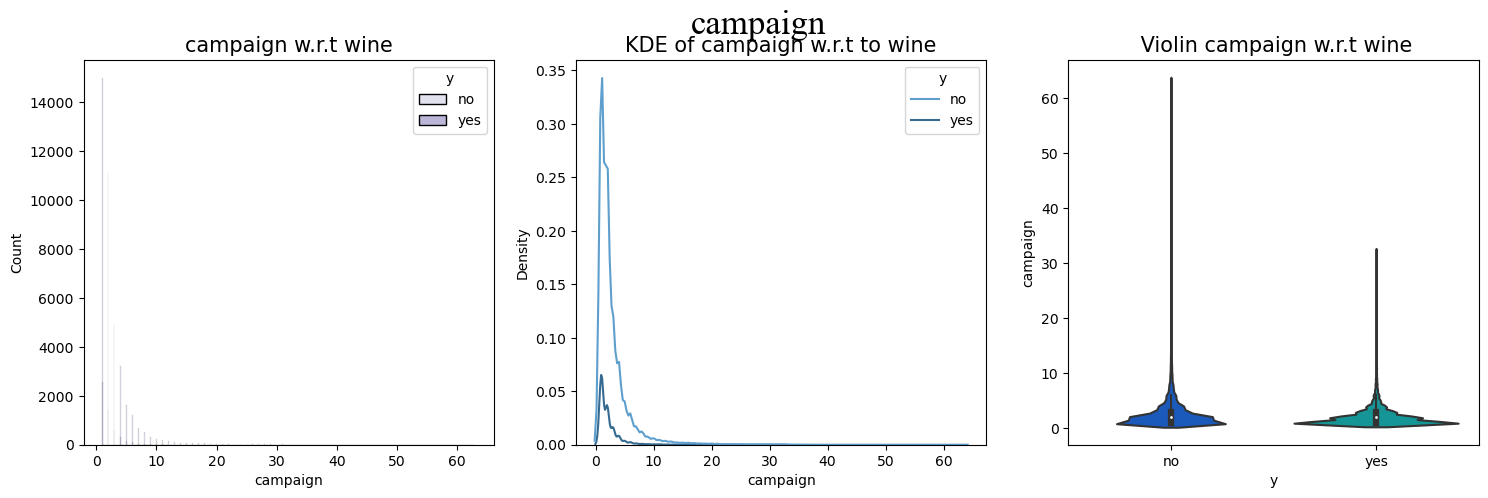

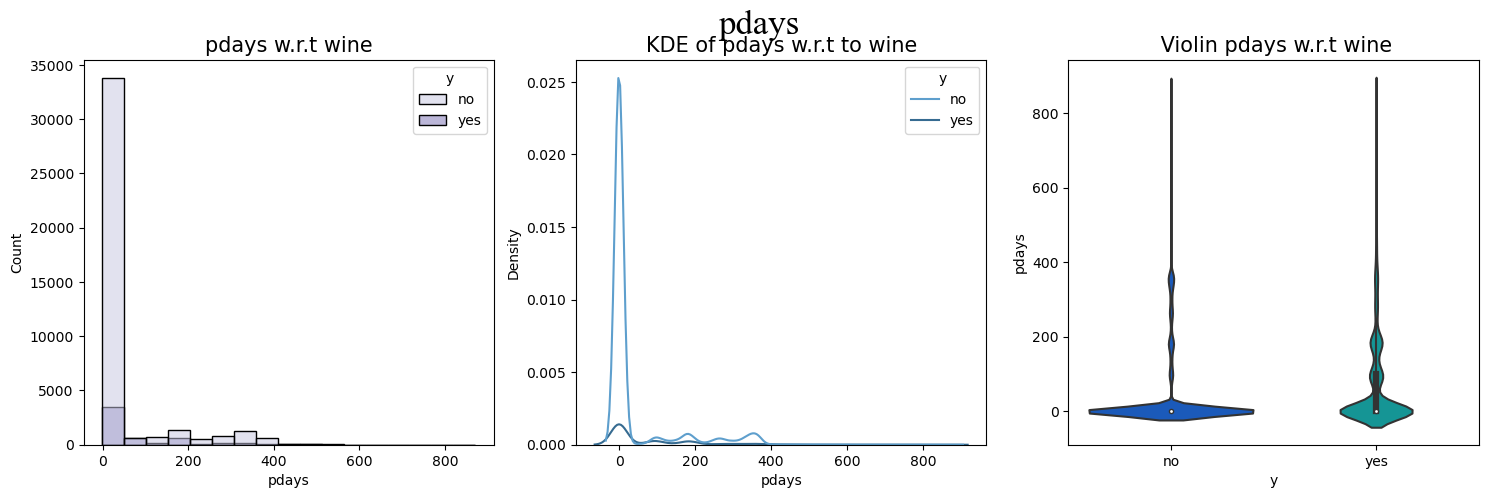

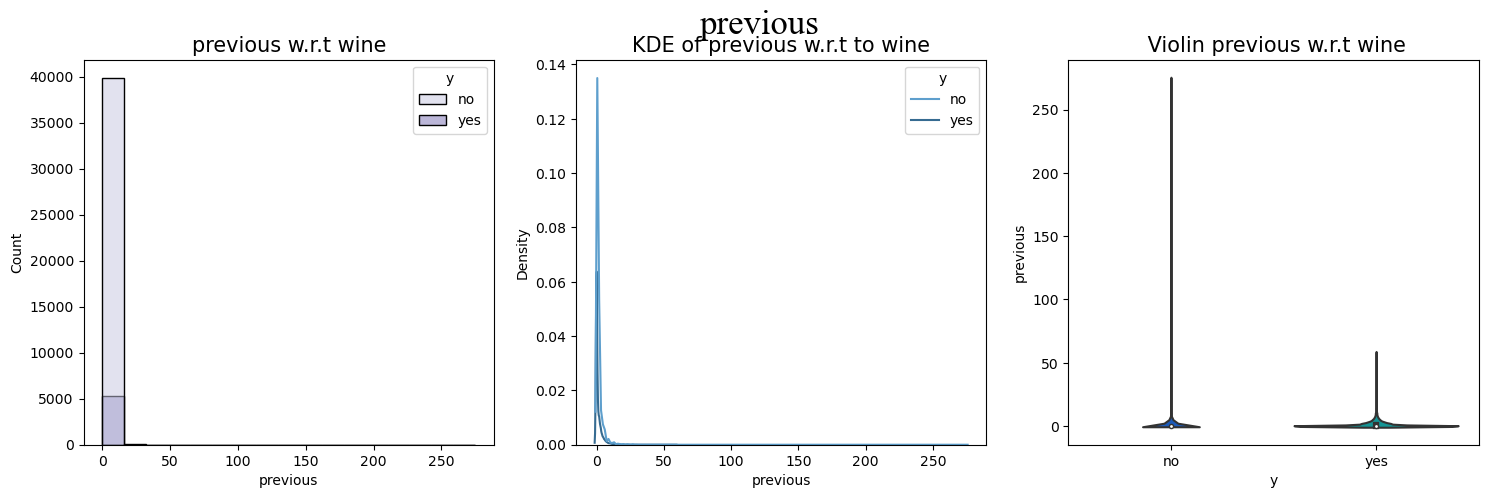

In [106]:
# We defined a list of columns 'cols' above.
for i in range(len(cols)):
    # Plotting the data for each feature with respect to wine category with a color palette
    # Also, Take time to analyse each distribution and frame inferences and the changes
    # Note the intuition of mean, median and modes along with std, variance, skewness and kurtosis
    plot_data_output(cols[i])

In [ ]:
# Lets plot pairplots to understand the feature relations
# Lets divide the dataframe into two 
sns.pairplot(df,hue='y',palette='RdBu_d')
plt.show()

## <mark>  <span style="color:darkblue">Automated EDA</span> </mark> <a class="anchor" id="Automated_EDA"></a>

In [1]:
# Now that we have seen manual plotting and Data preprocessing. Lets see the inferences from automated libraries
# We shall use Dataprep, Pandas-Profiling, Sweetviz libraries now

In [2]:
# Install the below libraries using the below code
# pip install dataprep

<a class="anchor" id="dataprep"></a>

In [3]:
# import dataprep
# from dataprep.eda import create_report
# create_report(df)

<a class="anchor" id="pandas_profiling"></a>
   

In [4]:
# pip install pandas-profiling

<a class="anchor" id="sweetviz"></a>

In [5]:
# pip install sweetviz 

## <mark><span style="color:Purple">Feature Engineering </span> </mark> <a class="anchor" id="Feature_Engineering"></a>

In [33]:
df.head(2)

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Optical density,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


## <mark> <span style="color:green">Correlation </span> </mark>  <a class="anchor" id="correlation"></a>

In [34]:
# Style change - Look for more styles - 'ggplot','dark_background','Solarize_Light2','bmh','grayscale' etc..,
plt.style.use('fivethirtyeight')

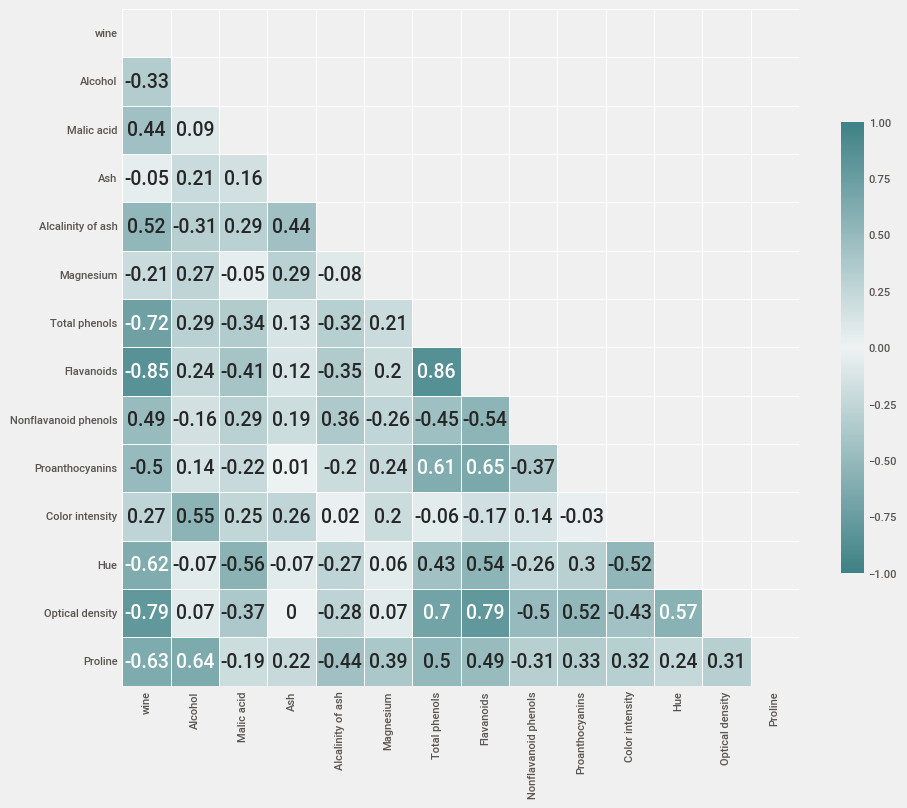

In [35]:
corr = df.corr().round(2)
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig11,ax11 = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(200,200,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmin=-1,vmax=1,center=0,square=True,linewidths=.5,cbar_kws={"shrink":0.5},annot=True)
plt.tight_layout()
plt.show()

## <mark><span style="color:Brown">Feature Transformation</span></mark> <a class="anchor" id="Feature_transformation"></a>

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['y'] = le.fit_transform(df['y'])

## <mark><span style="color:Brown">Feature Scaling</span></mark> <a class="anchor" id="Feature_Scaling"></a>


In [33]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0


In [34]:
# We should scale the data to bring the data to uniform scale
# import Scaling libraries; Use any of the Scalers to scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Scaling using Standard deviation
ss = StandardScaler()
# Converting the array output of Standardization to a dataframe
df['balance'] = ss.fit_transform(df[['balance']])
df['duration'] = ss.fit_transform(df[['duration']])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,0.2564,1,0,2,5,8,0.0110,1,-1,0,3,0
1,44,9,2,1,0,-0.4379,1,0,2,5,8,-0.4161,1,-1,0,3,0
2,33,2,1,1,0,-0.4468,1,1,2,5,8,-0.7074,1,-1,0,3,0
3,47,1,1,3,0,0.0472,1,0,2,5,8,-0.6452,1,-1,0,3,0
4,33,11,2,3,0,-0.4471,0,0,2,5,8,-0.2336,1,-1,0,3,0


##   <mark><span style="color:orange">Feature Importances</span></mark> <a class="anchor" id="Feature_Importance"></a>

 <mark>**1. Using Decision tree** </mark> <a class="anchor" id="decision_tree"></a>

In [35]:
# For finding important features, we need to seperate the dataframe
X = df.drop('y',axis=1)
y = df['y']

In [36]:
# Decision Tree instance
dtree = DecisionTreeClassifier()
# fit the model
dtree.fit(X,y)
# Find the important features using feature_importances_
Important_features_tree = dtree.feature_importances_
Important_features_tree

array([0.09823776, 0.04136596, 0.01944533, 0.0250785 , 0.00198802,
       0.12171541, 0.02296199, 0.00988304, 0.01809774, 0.08894795,
       0.09890787, 0.29222974, 0.03612531, 0.05682347, 0.01099625,
       0.05719566])

In [37]:
# Attach the columns of X to the feature importance labels
columns = X.columns
# Converting into a dataframe
feature_importance_tree = pd.DataFrame(Important_features_tree)
# Attach columns to it
feature_importance_tree['columns'] = columns.T

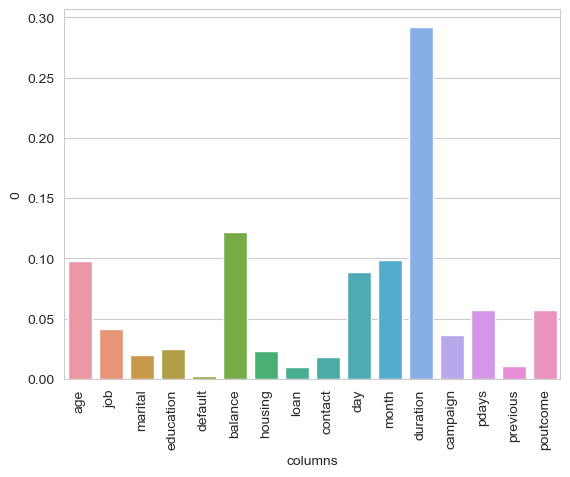

In [38]:
# Lets plot a barplot to visualize the important features
sns.set_style('whitegrid')
# Bar plot
sns.barplot(data=feature_importance_tree,x='columns',y=feature_importance_tree[0])
# rotate the labels
plt.xticks(rotation=90)
plt.show()

<mark>**2. Using Random Forest**</mark> <a class="anchor" id="random_forest"></a>

In [39]:
# Random Forest instance
rf = RandomForestClassifier()
# fit the model
rf.fit(X,y)
# Find the important features using feature_importances_
Important_features_rf = rf.feature_importances_
Important_features_rf

array([0.10413907, 0.04915751, 0.02151683, 0.02718961, 0.00185325,
       0.11004467, 0.02628292, 0.00963554, 0.01978523, 0.08869914,
       0.08723565, 0.29098432, 0.03878606, 0.05235975, 0.02023003,
       0.05210041])

In [40]:
# Attach the columns of X to the feature importance labels
columns = X.columns
# Converting into a dataframe
feature_importance_rf = pd.DataFrame(Important_features_rf)
# Attach columns to it
feature_importance_rf['columns'] = columns.T

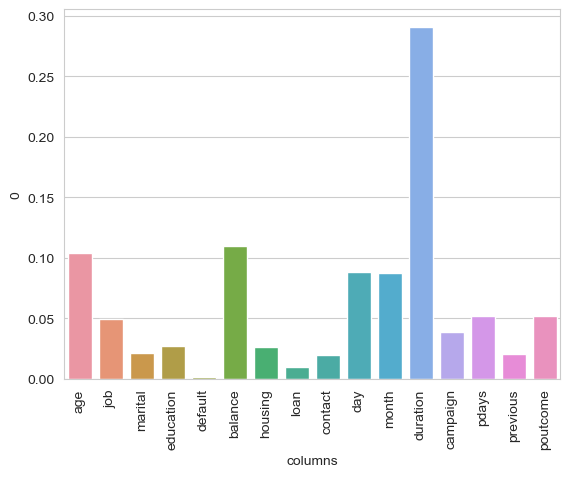

In [41]:
# Lets plot a barplot to visualize the important features
sns.set_style('whitegrid')
# Bar plot
sns.barplot(data=feature_importance_rf,x='columns',y=feature_importance_rf[0])
# rotate the labels
plt.xticks(rotation=90)
plt.show()

## <mark> <span  style= " font-family: Times New Roman"> Model Building  </span> </mark> <a class="anchor" id="Model_Building"></a>

### <mark>Train_test_data split </mark>

In [42]:
# Splitting the X,y into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(36168, 16) (9043, 16) (36168,) (9043,)


In [48]:
import lightgbm as lgb
import time
start = time.time()
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
end = time.time()
diff = end - start
print('Execution time for LightGBM (in Seconds):', diff)

Execution time for LightGBM (in Seconds): 0.278048038482666


In [49]:
# predict the results
y_pred=clf.predict(X_test)

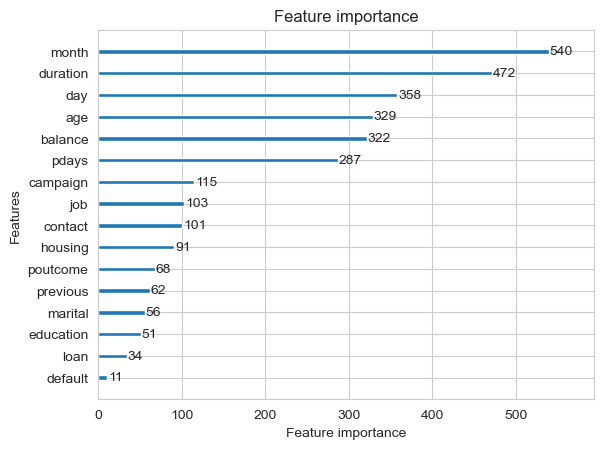

In [84]:
lgb.plot_importance(clf)
plt.show()

In [50]:
dict_results = {'Predicted':y_pred,'Actual':y_test}
results = pd.DataFrame(dict_results)
results

,Predicted,Actual
4393,0,0
4438,0,0
11108,1,0
35421,0,0
2667,0,0
...,...,...
14135,0,0
811,0,0
2885,0,0
18605,0,0


In [54]:
pd.crosstab(y_pred,y_test)

y,0,1
row_0,,
0,7716,530
1,278,519


In [55]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9296
Test set score: 0.9106


## <mark> <span  style= " font-family: Times New Roman"> Evaluation metrics  </span></mark> <a class="anchor" id="Evaluation_metrics"></a>

In [58]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy with LightGBM:",metrics.accuracy_score(y_test, y_pred))

Accuracy with LightGBM: 0.9106491208669689


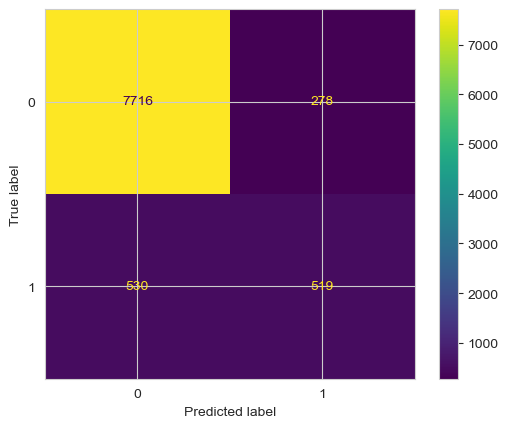

In [64]:
# Confusion Matrix for dtree model
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test,y_test,values_format='d',display_labels=['0','1'])
plt.show()

In [65]:
# Funtion to calculate True Positive Rate and False Positive Rate
def calculate_tpr_fpr(y_real, y_pred):
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    # True Negative
    TN = cm[0, 0]
    # False Positive
    FP = cm[0, 1]
    # False Negative
    FN = cm[1, 0]
    # True Positive
    TP = cm[1, 1]
    # Calculates TPR and FPR
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    return tpr, fpr

# Function to retrieve ROC Coordinates
def get_all_roc_coordinates(y_real, y_proba):
    # making a list of True positive rate values
    tpr_list = [0]
    # making of list of False positive rate values
    fpr_list = [0]
    # for all the values in the probability list for the test data calculated
    for i in range(len(y_proba)):
        # We define a threshold probability
        threshold = y_proba[i]
        # If its next values are greater than threshold, its 1 else 0
        y_pred = y_proba >= threshold
        # Use the above function to get the TPR and FPR values
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        # Append them to this list
        tpr_list.append(tpr)
        fpr_list.append(fpr)
        # Finally return the list as these are the axes for roc curves
    return tpr_list, fpr_list

# Function to plot ROC Curve from the above lists
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    if ax == None:
        # By default, size the figure to plot if there are no data given to axes
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
        
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
        # Plot a lineplot with the lists retrieved earlier
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    # set x-axis and y-axis limits
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    # Set labels for x-axes and y-axes
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

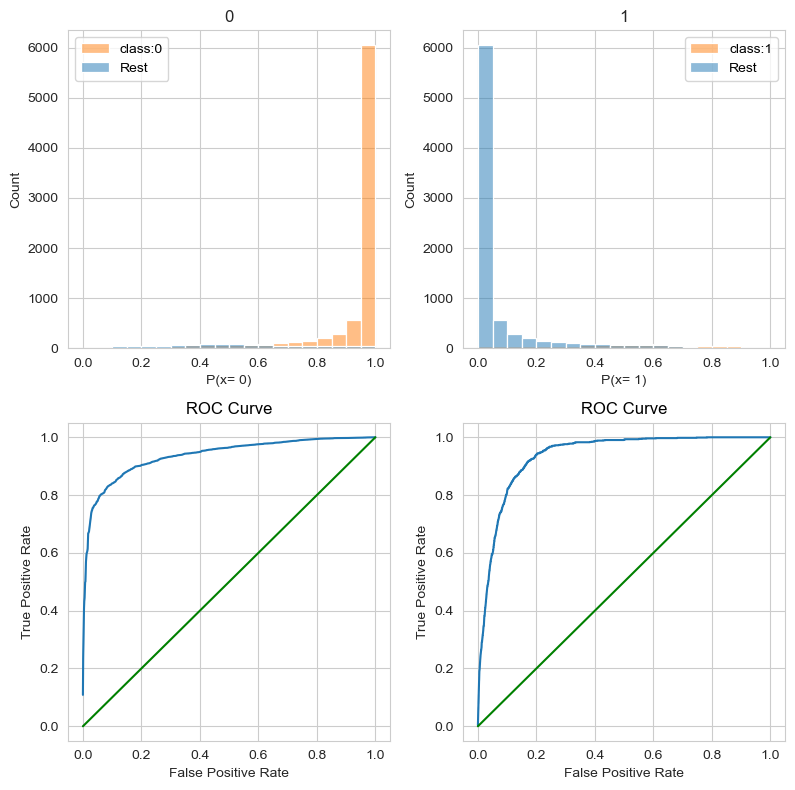

In [66]:
# Plot ROC-AUC Curve for LightGBM model
# Since it is a multiclass model, we will use Binary format \\

plt.figure(figsize=(12,8))
# Defining the bins for the histogram
bins = [i/20 for i in range(20)]+[1]
# list of classes in the model
classes = clf.classes_
# probability of data belonging to the each class
y_proba = clf.predict_proba(X_test)
roc_auc_ovr = {}

# For every class,
for i in range(len(classes)):
    c = classes[i]
    
    # Take a copy of the X-test
    df_aux = X_test.copy()
    # If the data belongs to that class its 1, else 0
    # We are converting the multiclass classification to the Binary format - This is OvR classification
    df_aux['class'] = [1 if y==c else 0 for y in y_test]
    # probability value of that class is attached to the dataframe
    df_aux['prob'] = y_proba[:,i]
    # set the index to default
    df_aux = df_aux.reset_index(drop=True)
    
    # Plots the probability distribution for the class and the rest
    # subplots- row, columns, iteration number
    ax = plt.subplot(2,3,i+1)
    # Histogram for each class given probability
    sns.histplot(x='prob',data=df_aux,hue='class',color='b',ax=ax,bins=bins)
    ax.set_title(c)
    # Legend set for every plot
    leg = ax.legend([f"class:{c}","Rest"])
    for text in leg.get_texts():
        text.set_color("black")
    ax.set_xlabel(f"P(x= {c})")
    
    # Calculates the ROC coordinates and plots the ROC curves
    ax_bottom = plt.subplot(2,3,i+4)
    # plot roc curve using above defined functions
    tpr,fpr = get_all_roc_coordinates(df_aux['class'],df_aux['prob'])
    plot_roc_curve(tpr,fpr,scatter=False,ax=ax_bottom)
    bottom = ax_bottom.set_title("ROC Curve",color='black')
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'],df_aux['prob'])
plt.tight_layout()  
plt.show()

In [67]:
# Displays the ROC AUC for each class
# Our dataset is too small for LightGBM algorithm, the same for the larger datasets will not be same
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    # iterate the values
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

0 ROC AUC OvR: 0.9367
1 ROC AUC OvR: 0.9367
average ROC AUC OvR: 0.9367


In [68]:
# F1-score is the harmonic mean of the precision and recall to balance the trade-off between them
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.95024631, 0.56229686])

In [69]:
# Preparing classification report for the model with dtree
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7994
           1       0.65      0.49      0.56      1049

    accuracy                           0.91      9043
   macro avg       0.79      0.73      0.76      9043
weighted avg       0.90      0.91      0.91      9043



In [71]:
XX = ss.fit_transform(df.drop('y',axis=1))
XX

array([[ 1.60696496, -0.10381968, -0.27576178, ..., -0.41145311,
        -0.25194037,  0.44489814],
       [ 0.28852927,  1.42400783,  1.3683719 , ..., -0.41145311,
        -0.25194037,  0.44489814],
       [-0.74738448, -0.71495069, -0.27576178, ..., -0.41145311,
        -0.25194037,  0.44489814],
       ...,
       [ 2.92540065,  0.20174582, -0.27576178, ...,  1.43618859,
         1.05047333, -0.56617504],
       [ 1.51279098, -1.02051619, -0.27576178, ..., -0.41145311,
        -0.25194037,  0.44489814],
       [-0.37068857, -0.71495069, -0.27576178, ...,  1.4761376 ,
         4.52357654, -1.57724822]])

In [72]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,0.2564,1,0,2,5,8,0.0110,1,-1,0,3,0
1,44,9,2,1,0,-0.4379,1,0,2,5,8,-0.4161,1,-1,0,3,0


In [73]:
df.shape

(45211, 17)

##  <mark> <span  style= " font-family: Times New Roman"> Hyperparameter tuning  </span></mark> <a class="anchor" id="Hyperparameter_Tuning"></a>

In [66]:
df.head(2)

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Optical density,Proline
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


In [92]:
# explore LightGBM ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# get a list of models to evaluate
def get_models():
    # Models with different estimators are taken into a dictionary
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000, 2000]
    for n in n_trees:
        # Appending them 
        models[str(n)] = lgb.LGBMClassifier(n_estimators=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

start = time.time()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
end = time.time()   
diff = end - start
print('Execution time for LightGBM (in Seconds):', diff)

>10 0.891 (0.002)
>50 0.909 (0.002)
>100 0.910 (0.003)
>500 0.908 (0.003)
>1000 0.906 (0.003)
>2000 0.905 (0.003)
Execution time for LightGBM (in Seconds): 218.14269423484802


In [93]:
# plot model performance for comparison
import plotly.graph_objects as go
# Initiate graph objects
fig = go.Figure()
for col in range(len(results)):
    # Adding subplots
    fig.add_trace(go.Box(y=results[col], name=str(names[col])))

# Update xlabels and ylabels
fig.update_xaxes(title_text = "No of n_estimators",title_font = {"size": 20},title_standoff = 25)
fig.update_yaxes(title_text = "Classification accuracy",title_standoff = 25)
fig.show()

In [94]:
# Building a model for observing accuracies for different depths with different cross validation models
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore depths from 1 to 10
    for i in range(1,11):
        # define ensemble model
        models[str(i)] = lgb.LGBMClassifier(max_depth=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

start = time.time()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
end = time.time()
diff = end-start
print('Execution time for LightGBM (in Seconds):', diff)

>1 0.890 (0.002)
>2 0.900 (0.003)
>3 0.905 (0.003)
>4 0.907 (0.003)
>5 0.908 (0.003)
>6 0.909 (0.003)
>7 0.909 (0.003)
>8 0.909 (0.003)
>9 0.909 (0.002)
>10 0.910 (0.002)
Execution time for LightGBM (in Seconds): 73.81435012817383


In [95]:
# Initiate graph objects
fig1 = go.Figure()
for col in range(len(results)):
    # Adding subplots
    fig1.add_trace(go.Box(y=results[col], name=str(names[col])))

# Update xlabels and ylabels
fig1.update_xaxes(title_text = "Train depths",title_font = {"size": 20},title_standoff = 25)
fig1.update_yaxes(title_text = "Classification accuracy",title_standoff = 25)
fig1.show()

In [100]:
# Finding best learning rate 
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore learning rates from 0.1 to 2 in 0.1 increments
    for i in np.arange(0.1, 2.1, 0.1):
        key = '%.3f' % i
        models[key] = lgb.LGBMClassifier(learning_rate=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

start = time.time()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
end = time.time()
diff = end-start
print('Execution time for LightGBM (in Seconds):', diff)

>0.100 0.910 (0.003)
>0.200 0.908 (0.004)
>0.300 0.905 (0.003)
>0.400 0.902 (0.004)
>0.500 0.900 (0.004)
>0.600 0.898 (0.004)
>0.700 0.895 (0.005)
>0.800 0.892 (0.007)
>0.900 0.892 (0.005)
>1.000 0.886 (0.009)
>1.100 0.871 (0.011)
>1.200 0.850 (0.026)
>1.300 0.834 (0.067)
>1.400 0.845 (0.041)
>1.500 0.824 (0.050)
>1.600 0.775 (0.131)
>1.700 0.794 (0.133)
>1.800 0.796 (0.107)
>1.900 0.804 (0.090)
>2.000 0.770 (0.146)
Execution time for LightGBM (in Seconds): 196.74648213386536


In [101]:
# Initiate graph objects
fig2 = go.Figure()
for col in range(len(results)):
    # Adding subplots
    fig2.add_trace(go.Box(y=results[col], name=str(names[col])))

# Update xlabels and ylabels
fig2.update_xaxes(title_text = "Learning rate",title_font = {"size": 20},title_standoff = 25)
fig2.update_yaxes(title_text = "Classification accuracy",title_standoff = 25)
fig2.show()

**We observed the best range of Hyperparameters to check the accuracy maxima**

In [102]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV
# define the model with default hyperparameters
model = lgb.LGBMClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.909867 using {'learning_rate': 0.1, 'n_estimators': 100}
0.883015 (0.000066) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.883015 (0.000066) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.883015 (0.000066) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.883015 (0.000066) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.883015 (0.000066) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.883015 (0.000066) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.889710 (0.001358) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.908643 (0.002639) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.890889 (0.001760) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.908916 (0.002263) with: {'learning_rate': 0.1, 'n_estimators': 50}
0.909867 (0.002909) with: {'learning_rate': 0.1, 'n_estimators': 100}
0.907722 (0.003254) with: {'learning_rate': 0.1, 'n_estimators': 500}
0.896559 (0.003695) with: {'learning_rate': 1.0, 'n_estimators': 10}
0.894038 (0.003697) 

In [103]:
fig9 = go.Figure()
fig9.add_trace(go.Scatter(y=means,mode='lines+markers',name='Means of the results'))
fig9.add_trace(go.Scatter(y=stds,mode='lines+markers',name='Standard Deviations results'))
fig9.update_layout(title="Means and Stds of results")
fig9.show()